<span style='font-size:24px; display:block;'>
Download data from database (influxdb)
</span>

<span style='font-size:40px; display:block;'>    
<b>Download data for specific variables</b></br>    
</span>

---
**Author**: Lukas Hörtnagl  
**Last update**: 19 Mar 2025

# **Imports**

In [1]:
import warnings
from datetime import datetime
import dbc_influxdb as dbc
warnings.simplefilter("ignore")

</br>

# **Connect to database**

In [2]:
# Folder with database configurations
DIRCONF = r'L:\Sync\luhk_work\20 - CODING\22 - POET\configs'  
# Instantiate class
dbc = dbc.dbcInflux(dirconf=DIRCONF)

Reading configuration files was successful.
Connection to database works.


</br>

# **Download from database**

In [3]:
# Settings
SITE = 'ch-cha'  # Site name
BUCKET = f'{SITE}_processed'
MEASUREMENTS = ['RH', 'TA', 'SW']  # Measurement name
FIELDS = ['RH_T1_2_1', 'TA_T1_2_1', 'SW_IN_T1_2_1']  # Variable name; InfluxDB stores variable names as '_field'
DATA_VERSION = ['meteoscreening_diive']

START = '2022-04-01 00:00:01'  # Download data starting with this date
STOP = '2022-04-03 00:00:01'  # Download data before this date (the stop date itself is not included)
TIMEZONE_OFFSET_TO_UTC_HOURS = 1  # Timezone, e.g. "1" is translated to timezone "UTC+01:00" (CET, winter time)

# Data download
data_simple, data_detailed, assigned_measurements = \
    dbc.download(
        bucket=BUCKET,
        measurements=MEASUREMENTS,
        fields=FIELDS,
        start=START,
        stop=STOP,
        timezone_offset_to_utc_hours=TIMEZONE_OFFSET_TO_UTC_HOURS,
        data_version=DATA_VERSION
)


DOWNLOADING
    from bucket ch-cha_processed
    variables ['RH_T1_2_1', 'TA_T1_2_1', 'SW_IN_T1_2_1']
    from measurements ['RH', 'TA', 'SW']
    from data version ['meteoscreening_diive']
    between 2022-04-01 00:00:01 and 2022-04-03 00:00:01
    with timezone offset to UTC of 1
Using querystring:
from(bucket: "ch-cha_processed") |> range(start: 2022-04-01T00:00:01+01:00, stop: 2022-04-03T00:00:01+01:00) |> filter(fn: (r) => r["_measurement"] == "RH" or r["_measurement"] == "TA" or r["_measurement"] == "SW") |> filter(fn: (r) => r["data_version"] == "meteoscreening_diive") |> filter(fn: (r) => r["_field"] == "RH_T1_2_1" or r["_field"] == "TA_T1_2_1" or r["_field"] == "SW_IN_T1_2_1") |> pivot(rowKey:["_time"], columnKey: ["_field"], valueColumn: "_value")
Used querystring: from(bucket: "ch-cha_processed") |> range(start: 2022-04-01T00:00:01+01:00, stop: 2022-04-03T00:00:01+01:00) |> filter(fn: (r) => r["_measurement"] == "RH" or r["_measurement"] == "TA" or r["_measurement"] == "SW"

</br>

# **Plot downloaded data**

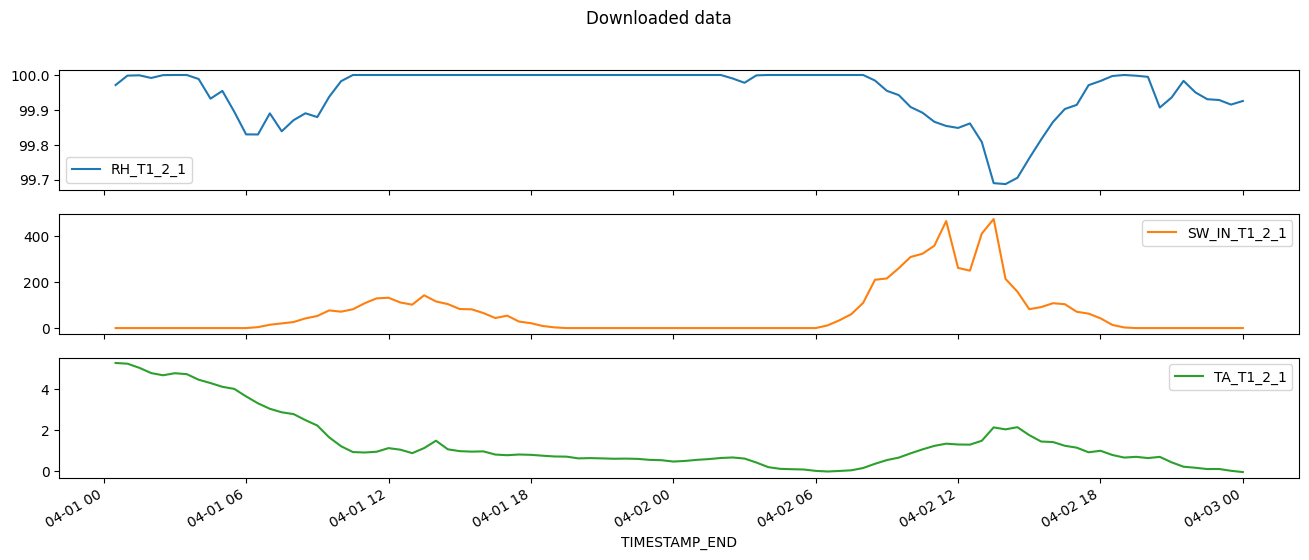

In [4]:
data_simple.plot(x_compat=True, figsize=(16, 6), title="Downloaded data", subplots=True);

</br>

# **Save to file**

In [5]:
data_simple

,RH_T1_2_1,SW_IN_T1_2_1,TA_T1_2_1
TIMESTAMP_END,,,
2022-04-01 00:30:00,99.971178,0.0,5.272717
2022-04-01 01:00:00,99.998216,0.0,5.238737
2022-04-01 01:30:00,99.999094,0.0,5.038240
2022-04-01 02:00:00,99.991460,0.0,4.781626
2022-04-01 02:30:00,99.999621,0.0,4.675158
...,...,...,...
2022-04-02 22:00:00,99.950110,0.0,0.173560
2022-04-02 22:30:00,99.930467,0.0,0.110067
2022-04-02 23:00:00,99.928214,0.0,0.113800


In [6]:
data_simple.to_csv(r"data.csv")

</br>

# **End of notebook.**
Congratulations, you reached the end of this notebook! Before you go let's store your finish time.

In [7]:
dt_string = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
print(f"Finished. {dt_string}")

Finished. 2025-03-19 08:37:18
